Retry of getting stock ticker IPO dates after Excel ate my datafile. Also get ticker EOD data for the 20 stocks whose websites I scraped (3/15/21)

In [1]:
from bs4 import BeautifulSoup
import requests
from requests import get

from IPython.core.display import display, HTML

In [2]:
from time import sleep
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np
import pandas as pd

In [61]:
!pip install tiingo

In [4]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages")

In [5]:
from tiingo import TiingoClient

In [6]:
config = {}
# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

### You will need to get an API key from  https://api.tiingo.com
### The API key is free and includes a max number of requests per hour and day, and data transfer.
### Paid account will give more requests and data transfer.

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "307d0cd85ac1760c0dc887e433b4673cc352d8a1"
#Initialize
client = TiingoClient(config)

In [116]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages")

In [58]:
!pip install pandas-datareader

In [7]:
import os
import pandas_datareader as pdr

In [14]:
companies_no_ipo_date = pd.read_csv("nasdaq_no_ipo_date.csv")
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      240 non-null    object 
 1   Name        240 non-null    object 
 2   Last Sale   240 non-null    object 
 3   Net Change  240 non-null    float64
 4   % Change    240 non-null    object 
 5   Market Cap  240 non-null    int64  
 6   Country     240 non-null    object 
 7   IPO Year    0 non-null      float64
 8   Volume      240 non-null    int64  
 9   Sector      240 non-null    object 
 10  Industry    240 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 20.8+ KB


In [15]:
#stock_tickers = companies.Symbol.values.tolist()
#print(stock_tickers[5])
#type(stock_tickers[5])

In [16]:
#no_ipo_date_companies = pd.read_csv("nasdaq_all_pharma_wo_ipo_date.csv")
#no_ipo_date_companies.info()

In [17]:
no_ipo_date_symbols = companies_no_ipo_date.Symbol.values.tolist()
print(no_ipo_date_symbols[0:5])
#type(no_ipo_date_symbols[5])

['ABEO', 'ABIO', 'ABMD', 'ACER', 'ACHC']


In [21]:
#ticker_no_ipo_metadata = pdr.tiingo.TiingoMetaDataReader(no_ipo_date_symbols, pause=0.2, api_key='307d0cd85ac1760c0dc887e433b4673cc352d8a1') #['adjClose']
#print(type(df_no_ipo_metadata))
#pd.DataFrame.from_dict(ticker_no_ipo_metadata, orient='index')
#df_no_ipo_metadata.to_csv('df_no_ipo_symbols_metadata.csv')
#print(df_no_ipo_metadata)

dict_list=[]
for symbol in no_ipo_date_symbols:
    dict_no_ipo_date=client.get_ticker_metadata(symbol)
    dict_list.append(dict_no_ipo_date)
df_symbol_no_ipo=pd.DataFrame(dict_list) 
df_symbol_no_ipo.head()

,endDate,exchangeCode,startDate,ticker,name,description
0,2021-03-10,NASDAQ,1980-09-19,ABEO,Abeona Therapeutics Inc,ABEO
1,2021-03-10,NASDAQ,1997-08-08,ABIO,ARCA biopharma Inc,"ARCA biopharma, Inc., a biopharmaceutical comp..."
2,2021-03-10,NASDAQ,1987-07-30,ABMD,Abiomed Inc,"Abiomed Europe GmbH, Aachen / Germany, as affi..."
3,2021-03-10,NASDAQ,2017-09-22,ACER,Acer Therapeutics Inc,Acer is a pharmaceutical company focused on th...
4,2021-03-10,NASDAQ,1994-03-04,ACHC,Acadia Healthcare Company Inc,Acadia is a leading provider of behavioral hea...


In [22]:
df_symbol_no_ipo.to_csv('metadata_symbols_w_no_ipo_date.csv')

In [ ]:
##Now have a csv file with metadata for all symbols that had no
##IPO date listed. Need to edit in excel to delete companies with 
##IPOs after 2015. Then  join with the csv file containing the
##tickers with IPO dates listed in the original data download.

In [96]:
#ticker_metadata = client.get_ticker_metadata("GOOGL")
#print(ticker_metadata)
df_google=pd.DataFrame.from_dict(ticker_metadata, orient='index') 
df_google

,0
endDate,2021-03-05
exchangeCode,NASDAQ
startDate,2004-08-19
ticker,GOOGL
name,Alphabet Inc - Class A
description,Google Inc. (Google) is a global technology co...


In [116]:
import datetime

In [131]:
#dict_list=[]
#for symbol in no_ipo_date_symbols:
 #   dict_no_ipo_date=client.get_ticker_metadata(symbol)
  #  dict_list.append(dict_no_ipo_date)
#df_symbol_no_ipo=pd.DataFrame(dict_list) 
#df_symbol_no_ipo.head()

,endDate,exchangeCode,startDate,ticker,name,description
0,2021-03-05,NASDAQ,1980-09-19,ABEO,Abeona Therapeutics Inc,ABEO
1,2021-03-05,NASDAQ,1997-08-08,ABIO,ARCA biopharma Inc,"ARCA biopharma, Inc., a biopharmaceutical comp..."
2,2021-03-05,NASDAQ,1987-07-30,ABMD,Abiomed Inc,"Abiomed Europe GmbH, Aachen / Germany, as affi..."
3,2021-03-05,NASDAQ,2017-09-22,ACER,Acer Therapeutics Inc,Acer is a pharmaceutical company focused on th...
4,2021-03-05,NASDAQ,1994-03-04,ACHC,Acadia Healthcare Company Inc,Acadia is a leading provider of behavioral hea...


In [132]:
df_symbol_no_ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 6 columns):
endDate         309 non-null object
exchangeCode    309 non-null object
startDate       309 non-null object
ticker          309 non-null object
name            307 non-null object
description     309 non-null object
dtypes: object(6)
memory usage: 14.6+ KB


In [133]:
df_symbol_no_ipo.to_csv('metadata_symbols_w_no_ipo_date.csv')

In [27]:
#Read in csv file w all existing biotech/pharma companies traded on 
#NASDAQ, with IPOs before 2016
df_pre_2016_ipo_companies=pd.read_csv('nasdaq_pre_2016_ALL.csv')

In [28]:
df_pre_2016_ipo_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      392 non-null    object 
 1   Name        392 non-null    object 
 2   Last Sale   392 non-null    object 
 3   Net Change  392 non-null    float64
 4   % Change    392 non-null    object 
 5   Market Cap  392 non-null    float64
 6   Country     392 non-null    object 
 7   IPO Year    392 non-null    object 
 8   Volume      392 non-null    int64  
 9   Sector      392 non-null    object 
 10  Industry    392 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 33.8+ KB


In [29]:
#Make a list of ticker symbols of all existing biotech/pharma companies traded on 
#NASDAQ, with IPOs before 2016
pre_2016_ipo_symbols = df_pre_2016_ipo_companies.Symbol.values.tolist()
print(pre_2016_ipo_symbols[0:5])
type(pre_2016_ipo_symbols[5])
type(pre_2016_ipo_symbols)

['CSII', 'FONR', 'AMGN', 'HCSG', 'LAKE']


list

In [30]:
##I don't have the metadata for all these companies. It might be useful.
##Pass the list of ticker symbols into the client and retrieve the metadata.
dict_list=[]
for symbol in pre_2016_ipo_symbols:
    dict_pre_2016_metadata=client.get_ticker_metadata(symbol)
    dict_list.append(dict_pre_2016_metadata)
df_nasdaq_pre_2016_metadata=pd.DataFrame(dict_list) 
df_nasdaq_pre_2016_metadata.head()

,endDate,exchangeCode,startDate,ticker,name,description
0,2021-03-10,NASDAQ,2006-06-28,CSII,Cardiovascular Systems Inc,"Cardiovascular Systems, Inc., based in St. Pau..."
1,2021-03-10,NASDAQ,1993-10-27,FONR,Fonar Corp,Fonar Corporation (Fonar) operates in two segm...
2,2021-03-10,NASDAQ,1984-09-07,AMGN,AMGEN Inc,Amgen is committed to unlocking the potential ...
3,2021-03-10,NASDAQ,1990-03-26,HCSG,Healthcare Services Group Inc,"Healthcare Services Group, Inc. provides manag..."
4,2021-03-10,NASDAQ,1990-03-26,LAKE,Lakeland Industries Inc,We manufacture and sell a comprehensive line o...


In [31]:
df_nasdaq_pre_2016_metadata.to_csv('df_nasdaq_pre_2016_metadata.csv')

In [35]:
df_nasdaq_pre_2016_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   endDate       392 non-null    object
 1   exchangeCode  392 non-null    object
 2   startDate     392 non-null    object
 3   ticker        392 non-null    object
 4   name          392 non-null    object
 5   description   392 non-null    object
dtypes: object(6)
memory usage: 18.5+ KB


In [32]:
##I now have a csv file with metadata, ticker symbols, and IPO dates for all
##biotech/pharma stocks traded on NASDAQ, with pre-2016 IPOs.

In [36]:
##Make a list of the ticker symbols.
pre_2016_ipo_symbols = df_nasdaq_pre_2016_metadata.ticker.values.tolist()
print(pre_2016_ipo_symbols[0:5])
type(pre_2016_ipo_symbols[5])
type(pre_2016_ipo_symbols)

['CSII', 'FONR', 'AMGN', 'HCSG', 'LAKE']


list

In [48]:
###  HISTORICAL EOD PRICES DOWNLOAD
###  THIS IS A RETRY WITH ONLY NASDAQ PHARMA/BIOTECH STOCKS WITH IPOs BEFORE 2016
###  THIS CODE BLOCK COLLECTS 4 YEARS OF DATA; 1/1/2016 TO 1/1/2020

#If I can pass in the list of ticker symbols stock_tickers, then I can have
#the pandas datareader download the closing prices for 4 years of the biotech 
#and pharma stocks in my list. Then save it to a csv file.
#stock_tickers

import time
startTime = time.time()

pharma_2016_2020_hist_data_list=[]
#use the list pre_2016_ipo_symbols from above. Get the data for each ticker symbol(this will be a pandas series),
#and append it to the list.
for ticker in pre_2016_ipo_symbols:
    try:
        ticker_prices = pdr.get_data_tiingo(ticker, start='2016-01-01', end='2020-01-01', 
                                           pause=0.2, api_key='307d0cd85ac1760c0dc887e433b4673cc352d8a1')
        pharma_2016_2020_hist_data_list.append(ticker_prices)
    except KeyError as ke:
        print('KeyError ', ke)
        

#Concatenate the list of series into a dataframe
df_2016_2020_hist_data=pd.concat(pharma_2016_2020_hist_data_list, axis=0)

#save the resulting dataframe to a csv file
df_2016_2020_hist_data.to_csv('df_pharma_2016_2020_hist_data.csv')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

KeyError  'date'
Execution time in seconds: 279.4563081264496


In [106]:
df_ALL_pharma_companies=pd.read_csv('ALL_Symbols_screener_nyse_nasdaq_amex.csv')

In [107]:
df_ALL_pharma_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      866 non-null    object 
 1   Name        866 non-null    object 
 2   Last Sale   866 non-null    object 
 3   Net Change  866 non-null    float64
 4   % Change    866 non-null    object 
 5   Market Cap  866 non-null    float64
 6   Country     866 non-null    object 
 7   IPO Year    556 non-null    float64
 8   Volume      866 non-null    int64  
 9   Sector      866 non-null    object 
 10  Industry    866 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 74.5+ KB


In [108]:
df_ALL_pharma_companies.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,CNMD,CONMED Corporation Common Stock,$122.66,0.24,0.20%,3.550119e+09,United States,1987.0,251611,Health Care,Biotechnology: Electromedical & Electrotherape...
1,HAE,Haemonetics Corporation Common Stock,$122.22,-3.02,-2.41%,6.211428e+09,United States,1991.0,839850,Health Care,Medical/Dental Instruments
2,USPH,U.S. Physical Therapy Inc. Common Stock,$110.80,-2.75,-2.42%,1.423951e+09,United States,1992.0,54594,Health Care,Medical/Nursing Services
3,NUS,Nu Skin Enterprises Inc. Common Stock,$50.63,-1.03,-1.99%,2.574249e+09,United States,1996.0,592081,Health Care,Other Pharmaceuticals
4,CSU,Capital Senior Living Corporation Common Stock,$29.64,-0.81,-2.66%,6.178742e+07,United States,1997.0,45321,Health Care,Hospital/Nursing Management


In [109]:
ALL_pharma_company_symbols = df_ALL_pharma_companies.Symbol.values.tolist()

In [110]:
##3/11/21
##I'm going to fetch metadata for the full list of biotech/pharma
##companies, agnostic of IPO year.

import time
startTime = time.time()

dict_list=[]
for symbol in ALL_pharma_company_symbols:
    try:
        dict_company=client.get_ticker_metadata(symbol)
        dict_list.append(dict_company)
    except HTTPError as he:
        print(symbol,'HTTPError ', he)
    
df_metadata_ALL_companies=pd.DataFrame(dict_list) 
df_metadata_ALL_companies.head()

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 126.26517009735107


In [111]:
df_metadata_ALL_companies.to_csv('df_metadata_ALL_companies.csv')

In [86]:
df_temp= pd.DataFrame(dict_list)
df_temp.tail()
##df_temp.info()

,endDate,exchangeCode,startDate,ticker,name,description
57,2021-03-11,NYSE,1996-12-26,DGX,Quest Diagnostics Inc,Quest Diagnostics empowers people to take acti...
58,2021-03-11,NYSE,1995-10-31,DVA,DaVita Inc,DaVita Inc. is a health care provider focused ...
59,2021-03-11,NYSE,2017-12-29,EHC,Encompass Health Corp,Encompass Health Corp
60,2021-03-11,NYSE,1980-06-12,ENZ,Enzo Biochem Inc,Enzo Biochem is a pioneer in molecular diagnos...
61,2021-03-11,NYSE,2000-03-27,EW,Edwards Lifesciences Corp,Edwards Lifesciences is the global leader of p...


In [87]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   endDate       62 non-null     object
 1   exchangeCode  62 non-null     object
 2   startDate     62 non-null     object
 3   ticker        62 non-null     object
 4   name          61 non-null     object
 5   description   62 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [89]:
##test
dict_list_test=[]
#for symbol in ALL_pharma_company_symbols:
ticker_list=['EHC', 'ENZ', 'EW', 'gen', 'HRC']

for symbol2 in ticker_list:
    dict_company2=client.get_ticker_metadata(symbol2)
    dict_list_test.append(dict_company2)
    
    
df_metadata_EW_ENZ=pd.DataFrame(dict_list_test) 
df_metadata_EW_ENZ

,endDate,exchangeCode,startDate,ticker,name,description
0,2021-03-11,NYSE,2017-12-29,EHC,Encompass Health Corp,Encompass Health Corp
1,2021-03-11,NYSE,1980-06-12,ENZ,Enzo Biochem Inc,Enzo Biochem is a pioneer in molecular diagnos...
2,2021-03-11,NYSE,2000-03-27,EW,Edwards Lifesciences Corp,Edwards Lifesciences is the global leader of p...
3,2021-03-11,NYSE,2007-05-15,GEN,Genesis Healthcare Inc - Class A,"Genesis Healthcare, Inc. is a holding company ..."
4,2021-03-11,NYSE,1987-03-02,HRC,Hill-Rom Holdings Inc,Hill-Rom is a leading global medical technolog...


In [90]:
df_metadata_EW_ENZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   endDate       5 non-null      object
 1   exchangeCode  5 non-null      object
 2   startDate     5 non-null      object
 3   ticker        5 non-null      object
 4   name          5 non-null      object
 5   description   5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


In [8]:
###Re-doing this with only Lilly LLY
### 4 YEARS OF DATA; 1/1/2016 TO 1/1/2020



import time
startTime = time.time()
pre_2016_ipo_symbols=['LLY']
lilly_2016_2020_hist_data_list=[]
#use the list pre_2016_ipo_symbols from above. Get the data for each ticker symbol(this will be a pandas series),
#and append it to the list.
for ticker in pre_2016_ipo_symbols:
    try:
        ticker_prices = pdr.get_data_tiingo(ticker, start='2016-01-01', end='2020-01-01', 
                                           pause=0.2, api_key='307d0cd85ac1760c0dc887e433b4673cc352d8a1')
        lilly_2016_2020_hist_data_list.append(ticker_prices)
    except KeyError as ke:
        print('KeyError ', ke)
        

#Concatenate the list of series into a dataframe
df_2016_2020_hist_data_lilly=pd.concat(lilly_2016_2020_hist_data_list, axis=0)

#save the resulting dataframe to a csv file
df_2016_2020_hist_data_lilly.to_csv('df_pharma_2016_2020_hist_data_lilly.csv')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 0.8666360378265381


In [9]:
df_2016_2020_hist_data_lilly.head()

close    high     low   open   volume  \
symbol date                                                               
LLY    2016-01-04 00:00:00+00:00  82.87  83.600  81.790  83.40  6907076   
       2016-01-05 00:00:00+00:00  84.11  85.400  82.870  82.90  7463864   
       2016-01-06 00:00:00+00:00  83.58  84.880  82.495  82.69  6628332   
       2016-01-07 00:00:00+00:00  81.41  82.810  80.830  81.63  5832405   
       2016-01-08 00:00:00+00:00  81.25  82.485  81.040  81.67  5880152   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
LLY    2016-01-04 00:00:00+00:00  73.233863  73.878979  72.279446  73.702235   
       2016-01-05 00:00:00+00:00  74.329676  75.469674  73.233863  73.260375   
       2016-01-06 00:00:00+00:00  73.861304  75.010140  72.902468  73.074794   
       2016-01-07 00:00:00+00:00  71.943632  73.180840  71.431075  72.138051   
       2016-01-08 00:00:00+00:00  71.802237  72.893631  71.616656  72.173399   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
LLY    2016-01-04 00:00:00+00:00    6907076      0.0          1.0  
       2016-01-05 00:00:00+00:00    7463864      0.0          1.0  
       2016-01-06 00:00:00+00:00    6628332      0.0          1.0  
       2016-01-07 00:00:00+00:00    5832405      0.0          1.0  
       2016-01-08 00:00:00+00:00    5880152      0.0          1.0

In [10]:
#pickle this dataframe
import pickle
with open('df_2016_2020_hist_data_lilly.pickle', 'wb') as to_write:
    pickle.dump(df_2016_2020_hist_data_lilly, to_write)

In [13]:
df_2016_2020_hist_data_lilly.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1006 entries, (LLY, 2016-01-04 00:00:00+00:00) to (LLY, 2019-12-31 00:00:00+00:00)
Data columns (total 12 columns):
close          1006 non-null float64
high           1006 non-null float64
low            1006 non-null float64
open           1006 non-null float64
volume         1006 non-null int64
adjClose       1006 non-null float64
adjHigh        1006 non-null float64
adjLow         1006 non-null float64
adjOpen        1006 non-null float64
adjVolume      1006 non-null int64
divCash        1006 non-null float64
splitFactor    1006 non-null float64
dtypes: float64(10), int64(2)
memory usage: 105.2+ KB


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#this dataframe  has a multi index. Need to reset it so that the dates go into a column
df_2016_2020_hist_data_lilly.reset_index(inplace=True)

In [15]:
df_2016_2020_hist_data_lilly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
symbol         1006 non-null object
date           1006 non-null datetime64[ns, UTC]
close          1006 non-null float64
high           1006 non-null float64
low            1006 non-null float64
open           1006 non-null float64
volume         1006 non-null int64
adjClose       1006 non-null float64
adjHigh        1006 non-null float64
adjLow         1006 non-null float64
adjOpen        1006 non-null float64
adjVolume      1006 non-null int64
divCash        1006 non-null float64
splitFactor    1006 non-null float64
dtypes: datetime64[ns, UTC](1), float64(10), int64(2), object(1)
memory usage: 110.2+ KB


In [18]:
df_2016_2020_hist_data_lilly.tail(1)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1005,LLY,2019-12-31 00:00:00+00:00,131.43,131.52,130.5,131.18,1549786,128.288449,128.376297,127.380678,128.044424,1549786,0.0,1.0


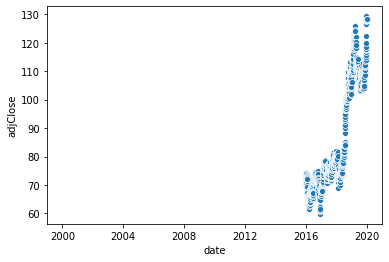

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(x='date', y='adjClose', data=df_2016_2020_hist_data_lilly, ax=ax)
#ax.set_xlim(2016, 2020)
#ax.set_xticks(range(2016, 2020))
plt.show()

In [27]:
#pickle this dataframe
import pickle
with open('df_2016_2020_hist_data_lilly_newindex.pickle', 'wb') as to_write:
    pickle.dump(df_2016_2020_hist_data_lilly, to_write)
df_2016_2020_hist_data_lilly.to_csv('df_2016_2020_hist_data_lilly_newindex.csv')

In [34]:
#symbol_list=[]
#symbols=['EXEL', 'DNA']
#for symbol in symbols:
 #   ticker_metadata=client.get_ticker_metadata(symbol)
  #  print(ticker_metadata)
   # df_symbol=pd.DataFrame.from_dict(ticker_metadata, orient='index') 
   # print(df_symbol)
    #start_date=df_symbol.get_value('startDate', 0)
   # print (start_date)
   # start_date=datetime(start_date)
    #if start_date<=2014-12-31:
      #  symbol_list.append(symbol)
     #   print(symbol_list)

In [ ]:
import time
startTime = time.time()

#####your python script#####

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

In [33]:
##I did this earlier--got a list of all ticker symbols that Tiingo keeps track of. 
##Not sure how helpful it was.
#df_symbols=pdr.tiingo.get_tiingo_symbols()
#df_symbols.to_csv('tiingo_symbols.csv')

In [47]:
#If I can pass in the list of ticker symbols stock_tickers, then I can have
#the pandas datareader download the closing prices for 5 years of the biotech 
#and pharma stocks in my list. Then save it to a csv file.
#Also print the time it took to execute

import time
startTime = time.time()

test4_hist_data_list=[]
test4_list=['EXEL', 'MSFT']
for ticker in test4_list:
    df_test4_prices = pdr.get_data_tiingo(ticker, start='2015-01-01', end='2020-01-01', 
                                           pause=0.2, api_key='307d0cd85ac1760c0dc887e433b4673cc352d8a1') #['adjClose']
    test4_hist_data_list.append(df_test4_prices)
print(type(test4_hist_data_list))
#test4_hist_data_list[0:5]
    

#df_pharma_prices.to_csv('pharma_prices.csv')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

<class 'list'>
Execution time in seconds: 1.499776840209961


In [44]:
#Each ticker gets its own list!!! Perfect! This gave me only the adjusted closing price
print(test4_hist_data_list[0])

                                  close   high      low   open   volume  \
symbol date                                                               
EXEL   2015-01-02 00:00:00+00:00   1.65   1.70   1.4600   1.47  5256481   
       2015-01-05 00:00:00+00:00   1.63   1.70   1.5435   1.67  2290484   
       2015-01-06 00:00:00+00:00   1.58   1.64   1.5600   1.64  1687215   
       2015-01-07 00:00:00+00:00   1.63   1.63   1.5950   1.60  1407375   
       2015-01-08 00:00:00+00:00   1.79   1.98   1.6700   1.67  9785422   
...                                 ...    ...      ...    ...      ...   
       2019-12-24 00:00:00+00:00  18.75  18.89  18.5337  18.88  1139269   
       2019-12-26 00:00:00+00:00  18.89  19.03  18.7000  18.70  1844369   
       2019-12-27 00:00:00+00:00  18.13  19.03  18.0400  19.00  2211760   
       2019-12-30 00:00:00+00:00  17.72  18.14  17.5400  18.10  2156612   
       2019-12-31 00:00:00+00:00  17.62  17.88  17.5700  17.60  1748201   

                        

In [46]:
##  axis=0 is better; I won't end up with a dataframe full of NaNs!!

df_test4_hist_data=pd.concat(test4_hist_data_list, axis=0)
df_test4_hist_data

close    high       low    open    volume  \
symbol date                                                                    
EXEL   2015-01-02 00:00:00+00:00    1.65    1.70    1.4600    1.47   5256481   
       2015-01-05 00:00:00+00:00    1.63    1.70    1.5435    1.67   2290484   
       2015-01-06 00:00:00+00:00    1.58    1.64    1.5600    1.64   1687215   
       2015-01-07 00:00:00+00:00    1.63    1.63    1.5950    1.60   1407375   
       2015-01-08 00:00:00+00:00    1.79    1.98    1.6700    1.67   9785422   
...                                  ...     ...       ...     ...       ...   
MSFT   2019-12-24 00:00:00+00:00  157.38  157.71  157.1200  157.48   8989150   
       2019-12-26 00:00:00+00:00  158.67  158.73  157.4000  157.56  14526927   
       2019-12-27 00:00:00+00:00  158.96  159.55  158.2200  159.45  18414352   
       2019-12-30 00:00:00+00:00  157.59  159.02  156.7300  158.99  16356720   
       2019-12-31 00:00:00+00:00  157.70  157.77  156.4500  156.77  18393383   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
EXEL   2015-01-02 00:00:00+00:00    1.650000    1.700000    1.460000   
       2015-01-05 00:00:00+00:00    1.630000    1.700000    1.543500   
       2015-01-06 00:00:00+00:00    1.580000    1.640000    1.560000   
       2015-01-07 00:00:00+00:00    1.630000    1.630000    1.595000   
       2015-01-08 00:00:00+00:00    1.790000    1.980000    1.670000   
...                                      ...         ...         ...   
MSFT   2019-12-24 00:00:00+00:00  155.373423  155.699215  155.116738   
       2019-12-26 00:00:00+00:00  156.646975  156.706210  155.393168   
       2019-12-27 00:00:00+00:00  156.933278  157.515756  156.202713   
       2019-12-30 00:00:00+00:00  155.580745  156.992513  154.731710   
       2019-12-31 00:00:00+00:00  155.689343  155.758450  154.455280   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
EXEL   2015-01-02 00:00:00+00:00    1.470000    5256481      0.0          1.0  
       2015-01-05 00:00:00+00:00    1.670000    2290484      0.0          1.0  
       2015-01-06 00:00:00+00:00    1.640000    1687215      0.0          1.0  
       2015-01-07 00:00:00+00:00    1.600000    1407375      0.0          1.0  
       2015-01-08 00:00:00+00:00    1.670000    9785422      0.0          1.0  
...                                      ...        ...      ...          ...  
MSFT   2019-12-24 00:00:00+00:00  155.472148    8989150      0.0          1.0  
       2019-12-26 00:00:00+00:00  155.551128   14526927      0.0          1.0  
       2019-12-27 00:00:00+00:00  157.417031   18414352      0.0          1.0  
       2019-12-30 00:00:00+00:00  156.962895   16356720      0.0          1.0  
       2019-12-31 00:00:00+00:00  154.771200   18393383      0.0          1.0  

[2516 rows x 12 columns]

In [159]:
###I ran this earlier. I will copy-paste it above to run with the new list of ticker symbols.

#If I can pass in the list of ticker symbols stock_tickers, then I can have
#the pandas datareader download the closing prices for 5 years of the biotech 
#and pharma stocks in my list. Then save it to a csv file.
#stock_tickers
pharma_2015_2020_hist_data_list=[]
#use the list pre_2015_ipo_symbols from above. Get the data for each ticker symbol(this will be a pandas series),
#and append it to the list.
for ticker in pre_2015_ipo_symbols:
    try:
        ticker_prices = pdr.get_data_tiingo(ticker, start='2015-01-01', end='2020-01-01', 
                                           pause=0.2, api_key='307d0cd85ac1760c0dc887e433b4673cc352d8a1')['adjClose']
        pharma_2015_2020_hist_data_list.append(ticker_prices)
    except KeyError as ke:
        print('KeyError ', ke)
        

#Concatenate the list of series into a dataframe
df_2015_2020_hist_data=pd.concat(pharma_2015_2020_hist_data_list, axis=1)

#save the resulting dataframe to a csv file
df_2015_2020_hist_data.to_csv('df_pharma_2015_2020_hist_data.csv')

KeyError  'date'
KeyError  'date'


In [17]:
df_test.to_csv('df_test.csv')

/Users/amysillman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
# TIINGO API - REQUEST DATA
# https://www.tiingo.com

#auth_token = r'307d0cd85ac1760c0dc887e433b4673cc352d8a1'


In [ ]:
price_list=[]
for ticker in stock_tickers:
    
    #get request
    response = get("https://api.tiingo.com/tiingo/daily/"
                   + ticker
                   +"/prices?startDate=2015-1-1&endDate=2020-1-1")
    #price_list.append(response)

    #sleep(randint(1,5))
    
     

In [10]:
#price_list=[]
#for ticker in stock_tickers:
    
    #get request
response = get("https://api.tiingo.com/tiingo/daily/EXEL/prices?startDate=2015-1-1&endDate=2020-1-1")
    #price_list.append(response)
print(response)
    #sleep(randint(1,5))

<Response [401]>


In [11]:
response=get("https://api.tiingo.com/tiingo/daily/EXEL/prices?startDate=2015-1-1&endDate=2020-1-1&format=csv&resampleFreq=monthly")
print(response)

<Response [401]>
